In [1]:
from networkx.algorithms import bipartite
from networkx import NetworkXError
import networkx as nx
from pathlib import Path
import networkx.algorithms.community as nxcom


# Community Detection
In social networks, ideas often spread easily within communities, but have a difficult time crossing to other communities. On the other hand, a contagious disease might spread across a community just as easily.
The simplest type of community detection searches for non-overlapping communities. In other words, a network is partitioned into communites such that each node belongs to exactly one community.

## Modularity Maximization 
One approach of finding such a partition is to define a function that quantifies the quality of a set of partitions, and then just adjust the partition to maximize the quality. One popular quality measure is called **modularity**. The general idea is that edges withn communities should be more common than edges across communities. We will use the greedy modularity communites function that implements Clauset-Newman-Moore community detection. Each node begins as its own. The two communites that most likely increase the modularity are then merged(known as a greedy strategy). This is repeated until merging any further would decrease the modularity

In [2]:
G_karate = nx.karate_club_graph()
# find communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)

print(len(communities))

3


## Visualizing


In [3]:
def set_node_community(G, communities):
    """Add community to node attributes""" 
    for c, v_c in enumerate(communities):
        for v in v_c:
            # add 1 to save o for external edges
            G.nodes[v]['community'] = c + 1


def set_edge_community(G):
    """Find internal edges and add their community to their attributes"""
    for v,w in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]["community"]:
            # internal edfe, mark with community
            G.edges[v,w]['community'] = G.nodes[v]["community"]
        else:
            # external edge, mark as 0
            G.edges[v,w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

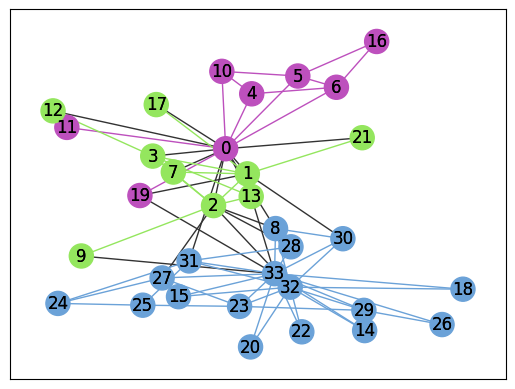

In [4]:
# set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

# set community color for nodes
node_color = [get_color(G_karate.nodes[v]["community"]) for v in G_karate.nodes]
external = [
    (v,w) for v,w in G_karate.edges if G_karate.edges[v,w]["community"] == 0
]

internal = [
    (v,w) for v,w in G_karate.edges if G_karate.edges[v,w]["community"] > 0
]

internal_color = [
get_color(G_karate.edges[e]['community']) for e in internal
]

karate_pos = nx.spring_layout(G_karate)

# draw external edges
nx.draw_networkx(
    G_karate, 
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color = "#333333"
)
# draw internal edges
nx.draw_networkx(
    G_karate, 
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color = internal_color
)

## An online Social Network
The same community detection algorithm can be used on much larger networks, such as online social networks

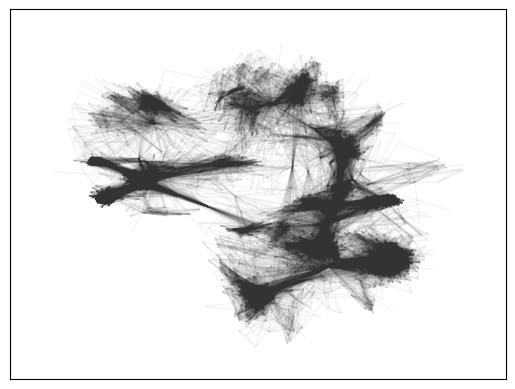

In [5]:
data_dir = "../data/mcauley2012/facebook_combined.txt"
G_social = nx.read_edgelist(data_dir)

#calculate layout and draw
pos = nx.spring_layout(G_social, k=0.1)
nx.draw_networkx(
    G_social,
    pos = pos,
    node_size=0,
    edge_color = "#333333",
    alpha=0.05,
    with_labels=False
)

In [6]:
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
print(len(communities))

16


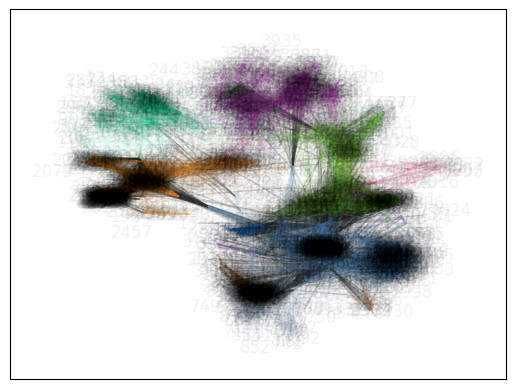

In [7]:
# set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

# set community color for nodes
node_color = [get_color(G_social.nodes[v]["community"]) for v in G_social.nodes]
external = [
    (v,w) for v,w in G_social.edges if G_social.edges[v,w]["community"] == 0
]

internal = [
    (v,w) for v,w in G_social.edges if G_social.edges[v,w]["community"] > 0
]

internal_color = [
get_color(G_social.edges[e]['community']) for e in internal
]


# draw external edges
nx.draw_networkx(
    G_social, 
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color = "#333333",
    alpha=0.2,
    with_labels=False
)
# draw internal edges
nx.draw_networkx(
    G_social, 
    pos=pos,
    edgelist=internal,
    node_size=0,
    edge_color = internal_color,
    alpha=0.05
)

## Girvan-Newaman - betweenness- based communities
This works by first assigning all nodes to a single large community and repeatedly splitting it into smaller communities
. It is mainly based on betweenness centrality. Betweenness centralities are first assigned to edges, and then the most central edges are removed until one of the communities is divided into two. This procedure repeats until each node is in its own community. The process can be stopped at any point in order to produce a specific number of communities, or a quality if measure such as modularity can be used to estimate a good stopping point

In [8]:
result = nxcom.girvan_newman(G_karate)
communities = next(result)
print(len(communities))

2


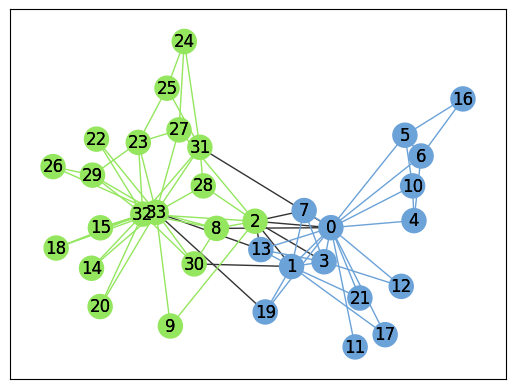

In [9]:
# set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

# set community color for nodes
node_color = [get_color(G_karate.nodes[v]["community"]) for v in G_karate.nodes]
external = [
    (v,w) for v,w in G_karate.edges if G_karate.edges[v,w]["community"] == 0
]

internal = [
    (v,w) for v,w in G_karate.edges if G_karate.edges[v,w]["community"] > 0
]

internal_color = [
get_color(G_karate.edges[e]['community']) for e in internal
]

karate_pos = nx.spring_layout(G_karate)

# draw external edges
nx.draw_networkx(
    G_karate, 
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color = "#333333"
)
# draw internal edges
nx.draw_networkx(
    G_karate, 
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color = internal_color
)

# Cliques
In the densest meighborhoods of a network, it is sometimes possible to find groups of nodes that are all connected to each other. Such groups are called **cliques**. Because cliques are highly interconnected, the nodes in a clique rarely belong to different communities. In fact, they form the core of communities

In [10]:
cliques = list(nx.find_cliques(G_karate))
cliques

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

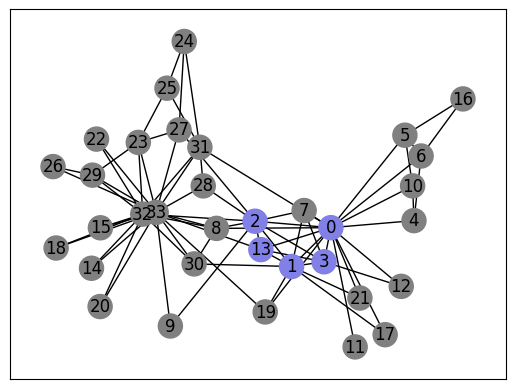

In [17]:
# find the max clique
max_clique = max(cliques, key=len)


# visualize the maximum clique
node_color = [(0.5, 0.5, 0.5) for v in G_karate.nodes()]
for i, v in enumerate(G_karate.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(G_karate, node_color=node_color, pos=karate_pos)


## K-cores
In larger networks, k-cores can be a pratical alternative for finding dense networks. A k-core is created by removing all node of degree less than k from a network. The larger k is the more nodes will be stripped away.

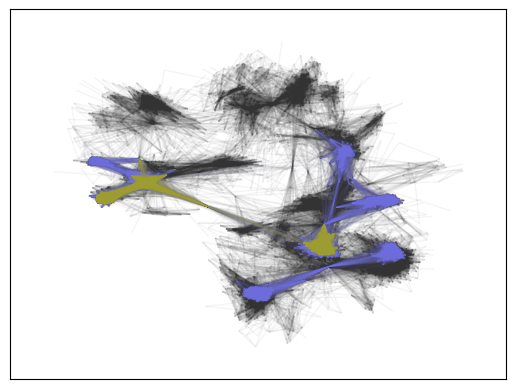

In [18]:
# Find k-cores
G_core_30 = nx.k_core(G_social, 30)
G_core_60 = nx.k_core(G_social, 60)
# Visualize network and k-cores
nx.draw_networkx(
G_social, pos=pos, node_size=0,
edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
G_core_30, pos=pos, node_size=0,
edge_color="#7F7FEF", alpha=0.05, with_labels=False)
nx.draw_networkx(
G_core_60, pos=pos, node_size=0,
edge_color="#AFAF33", alpha=0.05, with_labels=False)